In [2]:
import pandas as pd
import pylab as pl
import geopandas as gpd
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
est=pd.read_csv('cat_estacion.csv',encoding='latin-1')

In [3]:
base = gpd.read_file('cuadrantes2015.geojson')

In [4]:
df2017 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2017.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [5]:
df2016 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2016.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [6]:
df2015 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2015.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [7]:
df2014 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2014.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [8]:
df2013 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2013.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [9]:
yeardf=[df2013,df2014,df2015,df2016,df2017]

In [10]:
latmax=19.5
latmin=19.3
longmax=-99.05
longmin=-99.22

In [11]:
pollutants=['CO','PM10','PM2.5','NOX']

In [12]:
est=est[(est.latitud<=latmax)&(est.latitud>=latmin)&(est.longitud>longmin)&(est.longitud<longmax)]
est=est.reset_index()
est=est.drop('index',axis=1)

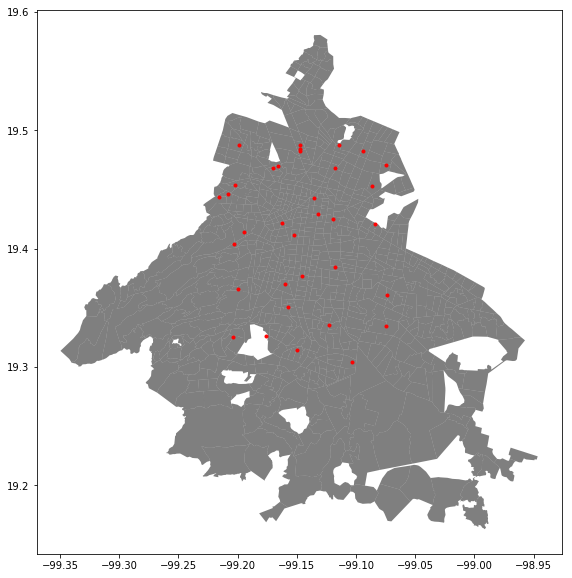

In [13]:
figsize(10,10)
base.geometry.plot(color='k',alpha=0.5)
pl.plot(est.longitud,est.latitud,'.',color='r')

In [14]:
stations=est.cve_estac.unique()

In [15]:
stations

array(['ARA', 'AZC', 'BJU', 'CAM', 'CCA', 'CES', 'CFE', 'COY', 'CUI',
       'GAM', 'HAN', 'HGM', 'IBM', 'IMP', 'IZT', 'LAA', 'LAG', 'LVI',
       'MCM', 'MER', 'MGH', 'MIN', 'PED', 'PLA', 'POT', 'SHA', 'SJA',
       'SUR', 'TAC', 'TAX', 'TEC', 'UAX', 'UIZ', 'UNM'], dtype=object)

In [16]:
df=pd.DataFrame()
for y in range(0,len(yeardf)):   
    for i in range(0,len(stations)):
        df=df.append(yeardf[y][yeardf[y].id_station==stations[i]])

In [17]:
finaldf=pd.DataFrame()
for i in range(0,4):
    finaldf=finaldf.append(df[df.id_parameter==pollutants[i]])

In [8]:
stations=finaldf.id_station.unique()

In [22]:
stations

array(['CAM', 'HGM', 'IZT', 'MER', 'PED', 'SJA', 'SUR', 'UAX', 'UIZ',
       'CCA', 'BJU', 'MGH', 'COY', 'GAM'], dtype=object)

In [20]:
finaldf=finaldf.reset_index()
finaldf=finaldf.drop(['index'],axis=1)

for i in range(0,len(finaldf)):
    if finaldf['date'][i][-5:]=='24:00':
        finaldf['date'][i]=finaldf['date'][i].replace('24:00','00:00')
    if i%10000==0:
        print (i)

In [25]:
finaldf.to_csv('finaldfperiferico.csv')

In [3]:
finaldf=pd.read_csv('finaldfperiferico.csv')

In [6]:
finaldf=finaldf.drop(['Unnamed: 0'],axis=1)

In [9]:
stationdf=[]
for i in range(0,len(stations)):
    stationdf.append(finaldf[finaldf.id_station==stations[i]])

In [11]:
choose=[0,1,2,3,4,5,7,8]

In [12]:
stations

array(['CAM', 'HGM', 'IZT', 'MER', 'PED', 'SJA', 'SUR', 'UAX', 'UIZ',
       'CCA', 'BJU', 'MGH', 'COY', 'GAM'], dtype=object)

In [13]:
poldf=[]
for i in range(0,len(stationdf)):
    poldf.append(pd.pivot_table(stationdf[i],index='date',values='value',columns='id_parameter'))
    poldf[i]=poldf[i].reset_index()
    
    #poldf[i]['date']=pd.to_datetime(poldf[i]['date'],dayfirst=True)
    #poldf[i]=poldf[i].sort_values(by='date')
    #poldf[i]=poldf[i].dropna(axis=0)

In [14]:
for i in choose:
    print(poldf[i].columns)

Index(['date', 'CO', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM10'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM2.5'], dtype='object', name='id_parameter')
Index(['date', 'CO', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='id_parameter')


In [15]:
co,nox,pm10,pm=[],[],[],[]
avpoll=np.zeros([len(poldf[0]),4])
for i in range(0,len(poldf[0])):
    for j in choose:
        co.append(poldf[j].CO[i])
        nox.append(poldf[j].NOX[i])
        if ((j!=5) & (j!=7)):
            pm10.append(poldf[j].PM10[i])
        if j!=2:
            pm.append(poldf[j]['PM2.5'][i])     
    avpoll[i][0]=np.nanmean(co)
    avpoll[i][1]=np.nanmean(nox)
    avpoll[i][2]=np.nanmean(pm10)
    avpoll[i][3]=np.nanmean(pm)
    co,nox,pm10,pm=[],[],[],[]

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [55]:
polldf=pd.DataFrame(avpoll,columns=['CO','NOx','PM10','PM2.5'])

In [19]:
for i in range(0,len(poldf[0])):
    if poldf[0]['date'][i][-5:]=='24:00':
        poldf[0]['date'][i]=poldf[0]['date'][i].replace('24:00','00:00')
    if i%10000==0:
        print (i)

0


/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


10000
20000
30000
40000


In [63]:
polldf['date']=pd.to_datetime(poldf[0].date,dayfirst=True)

In [64]:
polldf=polldf.reset_index()
polldf=polldf.drop(['index'],1)

In [67]:
for i in range(0,len(polldf)):
    if (polldf.date.dt.hour[i]==0):
        polldf.date.dt.day[i]+=1
    if i%10000==0:
        print(i)

0


/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  This is separate from the ipykernel package so we can avoid doing imports until


10000
20000
30000
40000


In [68]:
polldf=polldf.sort_values(by='date')

In [69]:
polldf=polldf[((polldf.date.dt.month==2)&(polldf.date.dt.day==29))==False]

In [73]:
polldf=polldf.dropna(axis=0)

In [74]:
polldf=polldf.reset_index()
polldf=polldf.drop(['index'],1)

In [207]:
len(polldf)

41754

In [214]:
interval=722

In [215]:
COmax=np.max(polldf.CO)
NOxmax=np.max(polldf.NOx)
PM10max=np.max(polldf.PM10)
PM2max=np.max(polldf['PM2.5'])

In [216]:
maxval=[COmax,NOxmax,PM10max,PM2max]

In [217]:
COmean=pd.rolling_mean(polldf.CO,interval)/COmax
NOxmean=pd.rolling_mean(polldf.NOx,interval)/NOxmax
PM10mean=pd.rolling_mean(polldf.PM10,interval)/PM10max
PMmean=pd.rolling_mean(polldf['PM2.5'],interval)/PM2max;

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=722,center=False).mean()
  """Entry point for launching an IPython kernel.
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=722,center=False).mean()
  
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=722,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a

In [218]:
meanval=[COmean,NOxmean,PM10mean,PMmean]

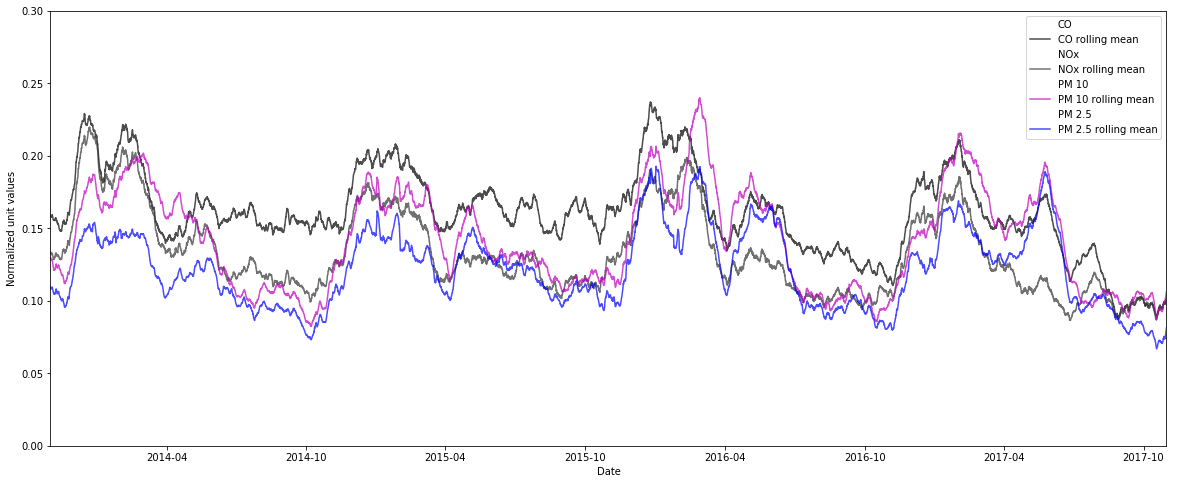

In [291]:
color=['0','.2','m','b']
figsize(20,8)
for i in range(0,4):
    pl.plot(polldf.date,polldf.iloc[:,i]/maxval[i],'--',color=color[i],alpha=0)
    pl.plot(polldf.date,meanval[i],color=color[i],alpha=.7)
pl.xlim('2013/10/31','2017/10/31')
pl.ylim(0,0.3)
pl.legend(['CO','CO rolling mean',
           'NOx','NOx rolling mean',
           'PM 10','PM 10 rolling mean',
           'PM 2.5','PM 2.5 rolling mean'],loc=1)
pl.ylabel('Normalized unit values')
pl.xlabel('Date')
pl.show();

In [405]:
X=pd.DataFrame(polldf.date.dt.day)
X=X.rename(columns={'date':'day'})
X1=pd.DataFrame(polldf.date.dt.month)
X1=X1.rename(columns={'date':'month'})
X2=pd.DataFrame(polldf.date)
X3=pd.DataFrame(polldf.date.dt.hour)
X3=X3.rename(columns={'date':'hour'})
Y=pd.DataFrame(COmean)

In [406]:
COmeandf=pd.concat([X,X1,Y,X2,X3],axis=1)

In [407]:
COmeandf=COmeandf.dropna(axis=0)

In [408]:
COmeandf=COmeandf.reset_index()
COmeandf=COmeandf.drop(['index'],axis=1)

In [409]:
COmean2013df=COmeandf[(COmeandf.date<'2014-10-31')&(COmeandf.date>='2013-10-31')]

In [418]:
lmCO=smf.ols('CO ~ C(day)+C(month)',COmeandf).fit()
lmCOpredict=lmCO.predict()

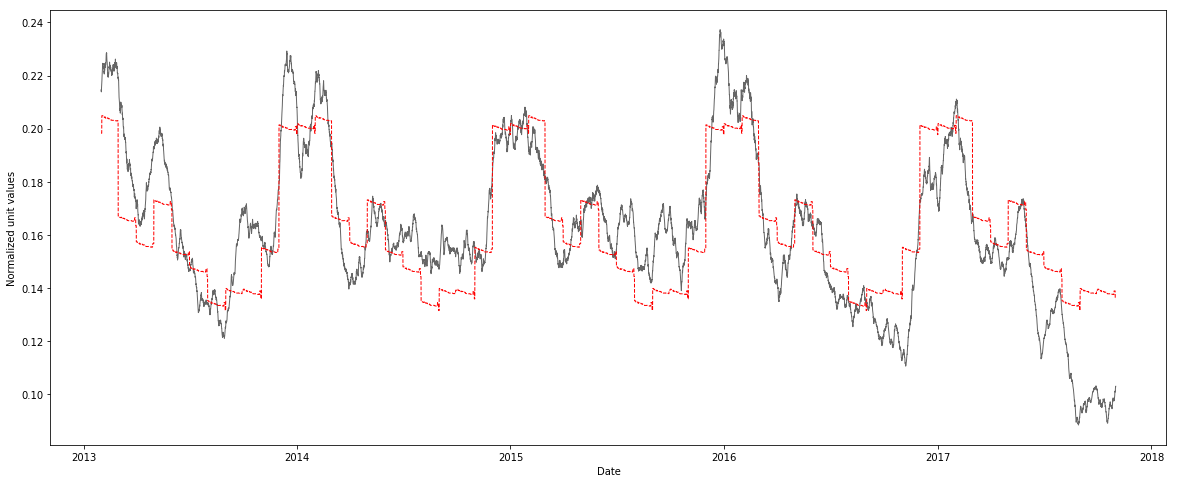

In [424]:
pl.plot(COmeandf.date,COmeandf.CO, linewidth=1,color='k',alpha=0.6)
pl.plot(COmeandf.date,lmCOpredict,'--',linewidth=1,color='r')
pl.ylabel('Normalized unit values')
pl.xlabel('Date')
#pl.xlim('2013/10/31','2014/10/31');

In [428]:
COstatmeandf=pd.DataFrame(np.array(COmeandf.CO)-lmCOpredict)

In [431]:
COstatmeandf.to_csv('COstatmeandf.csv')

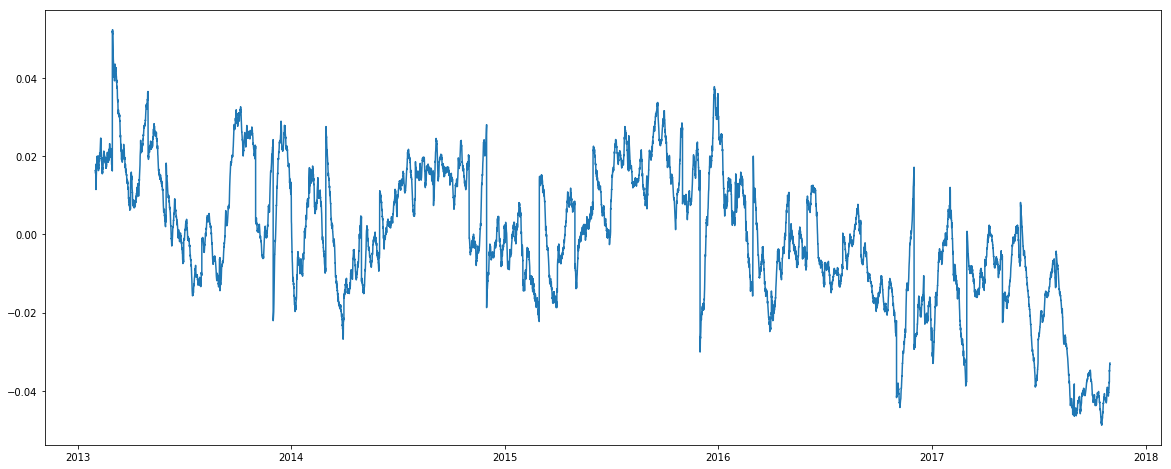

In [427]:
pl.plot(COmeandf.date,COstatmean)

In [ ]:
df=pd.DataFrame(pd.concat([X,Y],axis=1))

In [ ]:
df['X']=X.apply(lambda x: (float((x-polldf.date[0]).total_seconds()/3600)))

In [ ]:
figsize(20,8)
pl.plot(df.X,df.PM10,'k',alpha=0.5)
#pl.plot(curve, color='red', alpha=0.5)
pl.xlim(0,1000)

In [ ]:
dfCO2013=df[(df.date<'2014-10-31')&(df.date>='2013-10-31')]

In [ ]:
dfCO2014=df[(df.date<'2015-10-31')&(df.date>='2014-10-31')]

In [ ]:
dfCO2015=df[(df.date<'2016-10-31')&(df.date>='2015-10-31')]

In [ ]:
dfCO2016=df[(df.date<'2017-10-31')&(df.date>='2016-10-31')]

In [ ]:
dfCO1=np.array(dfCO2014['PM2.5'])-np.array(dfCO2013['PM2.5'])
dfCO2=np.array(dfCO2015['PM2.5'])-np.array(dfCO2014['PM2.5'])
dfCO3=np.array(dfCO2016['PM2.5'])-np.array(dfCO2015['PM2.5'])

In [ ]:
dfCO1=np.array(dfCO2014.PM10)-np.array(dfCO2013.PM10)
dfCO2=np.array(dfCO2015.PM10)-np.array(dfCO2014.PM10)
dfCO3=np.array(dfCO2016.PM10)-np.array(dfCO2015.PM10)

In [ ]:
dfCO1=np.array(dfCO2014.NOx)-np.array(dfCO2013.NOx)
dfCO2=np.array(dfCO2015.NOx)-np.array(dfCO2014.NOx)
dfCO3=np.array(dfCO2016.NOx)-np.array(dfCO2015.NOx)

In [ ]:
dfCO2014['statCO']=dfCO1
dfCO2015['statCO']=dfCO2
dfCO2016['statCO']=dfCO3

In [ ]:
dfstat=pd.concat([dfCO2014,dfCO2015,dfCO2016],axis=0)

In [ ]:
pl.plot(dfstat.date,dfstat.statCO,color='k',alpha=0.7)
pl.xlim('2015-12-01','2016-01-31')

In [ ]:
dfstat=dfstat.reset_index()
dfstat=dfstat.drop(['index'],axis=1)

In [ ]:
dfstat.to_csv('dfstatPM2.csv')

In [ ]:
fig = pl.figure(figsize = (20 ,18))
ax0,ax1,ax2,ax3 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223),fig.add_subplot(224)